In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
f = mticker.ScalarFormatter(useMathText=True)

import scipy
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime as dt
from datetime import date, timedelta
import datetime
from matplotlib.dates import YearLocator, DateFormatter

import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [22]:
###############
# LaTeX block #
###############

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']})
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rcParams['legend.numpoints'] = 1

In [23]:
def plot_cosmetics_single():
    
    ax = plt.gca()
    ax.tick_params(direction='in', axis='both', which='major', length=6.5, width=1.2, labelsize=18)
    ax.tick_params(direction='in', axis='both', which='minor', length=3., width=1.2, labelsize=18)
    ax.xaxis.set_tick_params(pad=7)
    ax.xaxis.labelpad = 5
    ax.yaxis.labelpad = 15
    
    
def plot_cosmetics_multi():    
    
    ax = plt.gca()
    ax.tick_params(direction='in', axis='both', which='major', length=6.5, width=1.2, labelsize=20)
    ax.tick_params(direction='in', axis='both', which='minor', length=3., width=1.2, labelsize=20)
    ax.xaxis.set_tick_params(pad=10)
    ax.xaxis.labelpad = 5
    ax.yaxis.labelpad = 10

## Use Ticker to plot directly from Yahoo Finance.

<Axes: title={'center': "APPLE's stock price"}, xlabel='Date'>

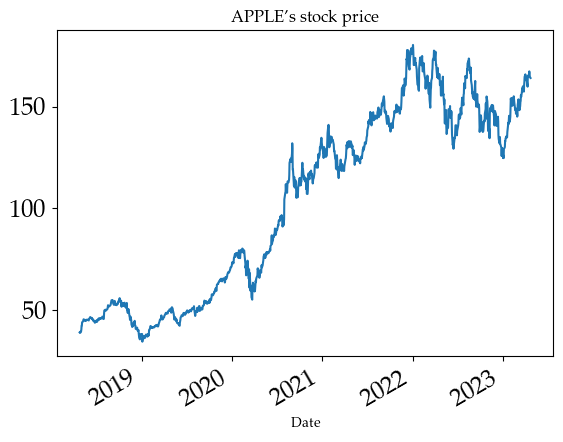

In [24]:
ticker = yf.Ticker('AAPL')
aapl_df_ticker = ticker.history(period="5y")
aapl_df_ticker['Close'].plot(title="APPLE's stock price")

## Get access to the data and also store them in arrays.
I want to obtain the same plot.

In [25]:
# download the series, not necessary for the next step
aapl_df = yf.download('AAPL', 
                      start='2019-01-01', 
                      end='2021-06-12', 
                      progress=False,
)
print(f'{aapl_df.head()}')



# store it as a pandas dataframe, to have it accessible as numpy arrays
asset_aapl = pd.DataFrame( yf.download('AAPL', 
                      start='2019-01-01', 
                      #end='2021-06-12', 
                      progress=False)
)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047043  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257286  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719692  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640198  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.319611  164101200


Data spanning 1573 days, from 2019-01-02 00:00:00 to 2023-04-24 00:00:00.


Text(0.5, 0, 'Date')

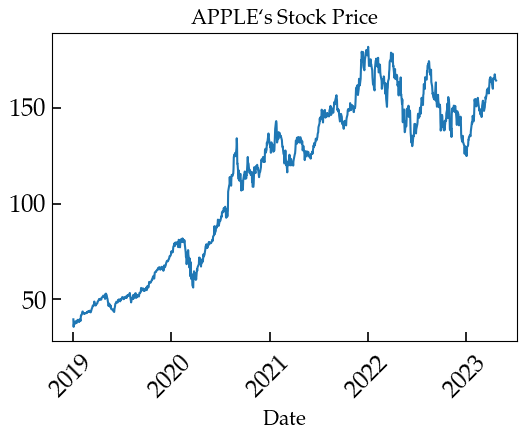

In [29]:
closing_price_aapl = asset_aapl.loc[:, 'Close']          # access the the dataframe
asset_aapl['Date'] = pd.to_datetime(asset_aapl.index)    # store the date 
date_aapl = pd.to_datetime(asset_aapl.index)             # convert it to use it for computation, not essential

print(f'Data spanning {(asset_aapl.Date.max() - asset_aapl.Date.min()).days} days, from {asset_aapl.Date.min()} to {asset_aapl.Date.max()}.')


f, ax = plt.subplots(figsize = [6., 4.])
plot_cosmetics_single()

ax.set_title('APPLE`s Stock Price', fontsize=15)
ax.plot(asset_aapl['Date'], closing_price_aapl)
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date', fontsize=15)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1085 entries, 2019-01-02 to 2023-04-24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1085 non-null   float64       
 1   High       1085 non-null   float64       
 2   Low        1085 non-null   float64       
 3   Close      1085 non-null   float64       
 4   Adj Close  1085 non-null   float64       
 5   Volume     1085 non-null   int64         
 6   Date       1085 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.8 KB


<Axes: >

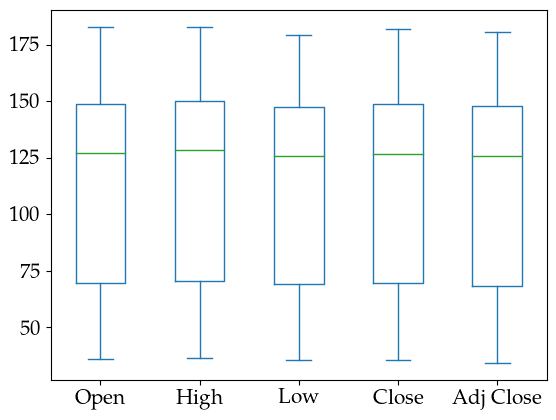

In [27]:
asset_aapl.info()
asset_aapl[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box', fontsize=15)

## I want to make the plot interactive with the mouse.

In [28]:
iplot_layout = go.Layout(
    title = 'Stock Prices of Apple',
    xaxis = dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis = dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

apple_data = [{ 'x' : asset_aapl['Date'], 'y' : asset_aapl['Close'] }]
plot = go.Figure(data=apple_data, layout=iplot_layout)


iplot(plot)